In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score

In [2]:
#preparing and collecting data
import os
path=os.listdir("C:\\Users\\DELL\\Downloads\\brain_tumour\\Training")
classes={'no_tumor':0,"pituitary_tumor":1,"meningioma_tumor":2,"glioma_tumor":3}

In [3]:
import cv2
X = []# x will contain all images
Y = []# y contains the targets

#for each class in tarining
for cls in classes:
    #extract the images from the folders in traing
    # for that we are extracting the path
    pth = "C:\\Users\\DELL\\Downloads\\brain_tumour\\Training\\"+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'\\'+j, 0)
        #0 for gray
        #reshaping for each image to have same size
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [4]:
#creating numpy array
x=np.array(X)
y=np.array(Y)

In [5]:
# count of each class
from collections import Counter
Counter(Y)

Counter({0: 395, 1: 827, 2: 822, 3: 826})

In [6]:
x.shape

(2870, 200, 200)

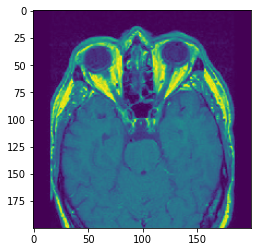

In [7]:
#visualizing the data
plt.imshow(X[0])

In [8]:
#prepare data
x_updated=x.reshape(len(x),200*200)
x_updated.shape

(2870, 40000)

In [9]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x_updated,Y,random_state=0,test_size=0.2)

In [10]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [11]:
#applying Pca
# from sklearn.decomposition import PCA
# pca=PCA()
# pca.fit(x_train)

In [13]:
#find optimal k
# k=0
# varience=0
# total=sum(pca.explained_variance_)
# while(varience/total<0.99):
#     varience+=pca.explained_variance_[k]
#     k+=1
# k

In [14]:
# pca=PCA(n_components=k)
# x_train=pca.fit_transform(x_train)
# x_test=pca.transform(x_test)

In [12]:
#training using SVM
from sklearn.svm import SVC
sv = SVC(kernel="rbf",C=1)
sv.fit(x_train, y_train)

SVC(C=1)

In [15]:
print("Training Score:", sv.score(x_train, y_train))
print("Testing Score:", sv.score(x_test, y_test))

Training Score: 0.9603658536585366
Testing Score: 0.8257839721254355


In [16]:
#training using LogisticRegression
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(max_iter=10000)
lg.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [17]:
print("Training Score:", lg.score(x_train, y_train))
print("Testing Score:", lg.score(x_test, y_test))

Training Score: 1.0
Testing Score: 0.8327526132404182


In [23]:
### test the model
clss={0:'no_tumor',1:"pituitary_tumor",2:"meningioma_tumor",3:"glioma_tumor"}

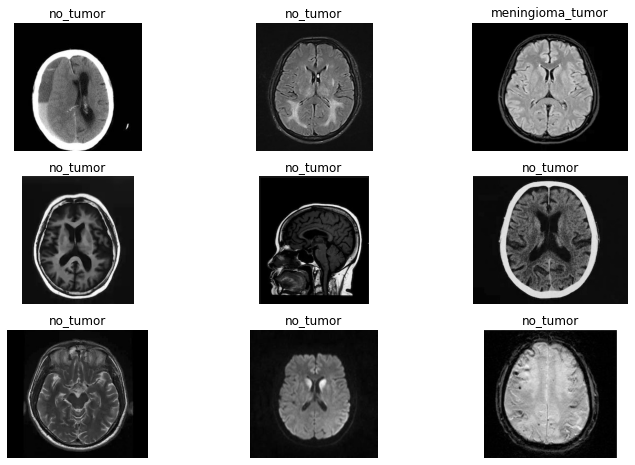

In [24]:
plt.figure(figsize=(12,8))
p = os.listdir('C:\\Users\\DELL\\Downloads\\brain_tumour\\Testing')
c=1
for i in os.listdir('C:\\Users\\DELL\\Downloads\\brain_tumour\\Testing\\no_tumor\\')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('C:\\Users\\DELL\\Downloads\\brain_tumour\\Testing\\no_tumor\\'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)
    p = lg.predict(img1)
    plt.title(clss[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

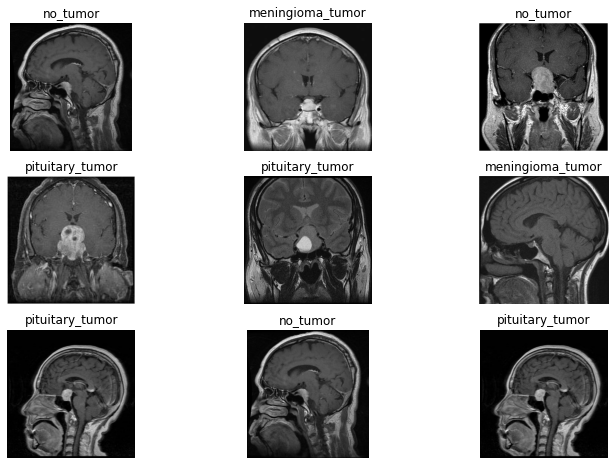

In [25]:
plt.figure(figsize=(12,8))
p = os.listdir('C:\\Users\\DELL\\Downloads\\brain_tumour\\Testing')
c=1
for i in os.listdir('C:\\Users\\DELL\\Downloads\\brain_tumour\\Testing\\pituitary_tumor\\')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('C:\\Users\\DELL\\Downloads\\brain_tumour\\Testing\\pituitary_tumor\\'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)
    p = lg.predict(img1)
    plt.title(clss[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

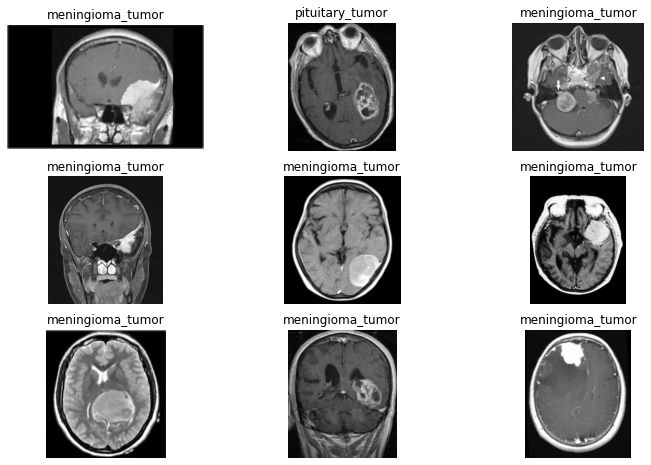

In [26]:
plt.figure(figsize=(12,8))
p = os.listdir('C:\\Users\\DELL\\Downloads\\brain_tumour\\Testing')
c=1
for i in os.listdir('C:\\Users\\DELL\\Downloads\\brain_tumour\\Testing\\meningioma_tumor\\')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('C:\\Users\\DELL\\Downloads\\brain_tumour\\Testing\\meningioma_tumor\\'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)
    p = lg.predict(img1)
    plt.title(clss[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1